<a href="https://colab.research.google.com/github/bsallesp/keras_neural/blob/main/02_Bruno_Salles_Pereira.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Testing general kinds of neural networks

In [511]:
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd

import keras
from keras.layers import Input, Dense
from keras.models import Model, Sequential
from keras import metrics
from keras.callbacks import History 

import tensorflow as tf

In [512]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [513]:
x = np.random.uniform(low = -10, high = 10, size = 100)
eps = np.random.normal(loc = 0, scale = 15, size = 100)

In [514]:
y = -3 * x + 5 + eps

In [515]:
# Train-test split:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

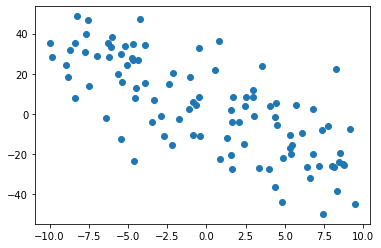

In [516]:
plt.scatter(x, y)
plt.show()

In [517]:
np.mean(y)

3.2370442850775936

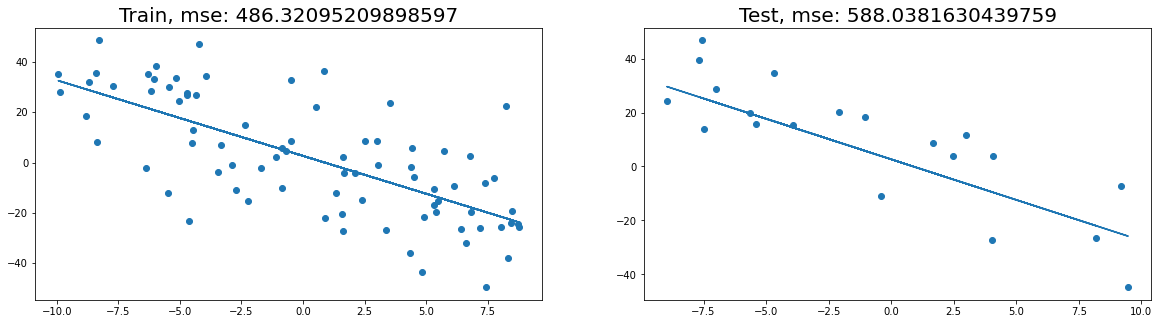

In [518]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr = LinearRegression()

lr.fit(X_train.reshape(-1, 1), Y_train)

pred = lr.predict(X_train.reshape(-1, 1))

mse = mean_squared_error(X_train, pred)
pred_test = lr.predict(X_test.reshape(-1, 1))
mse_test = mean_squared_error(X_test, pred_test)


plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
plt.title(label=f"Train, mse: {mse}", size="20")
plt.scatter(X_train, Y_train)
plt.plot(X_train, pred)

plt.subplot(1, 2, 2)
plt.title(label=f"Test, mse: {mse_test}", size="20")
plt.scatter(X_test, Y_test)
plt.plot(X_test, pred_test)
plt.show()

In [519]:
model = tf.compat.v1.keras.experimental.LinearModel()
model.compile(optimizer='sgd', loss='mse')
model.fit(X_train, Y_train, epochs=500, verbose=0)

In [520]:
pred = model.predict(X_train)

In [521]:
model.summary()

Model: "linear_model_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  1         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [522]:
mse = mean_squared_error(Y_train, pred)

In [523]:
pred_test = model.predict(X_test)
mse_test = mean_squared_error(Y_test, pred_test)

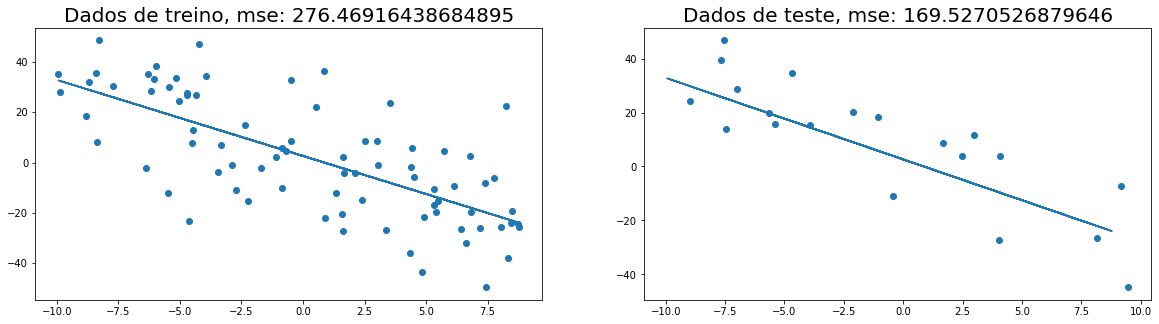

In [524]:
plt.figure(figsize=(20, 5))

plt.subplot(1,2,1)
plt.title(label=f"Dados de treino, mse: {mse}", size = 20)
plt.scatter(X_train, Y_train)
plt.plot(X_train, pred)

plt.subplot(1,2,2)
plt.title(label=f"Dados de teste, mse: {mse_test}", size = 20)
plt.scatter(X_test, Y_test)
plt.plot(X_train, pred)

plt.show()

In [525]:
x_2 = x**2
x_2 = np.append(x.reshape(-1, 1), x_2.reshape(-1, 1), axis=1)
print(x[0]**2)
print(x_2[0][1])

8.285996900882992
8.285996900882992


In [526]:
# Train-test split:
X_train, X_test, Y_train, Y_test = train_test_split(x_2, y, test_size = 0.20, random_state = 1)
X_train.shape

(80, 2)

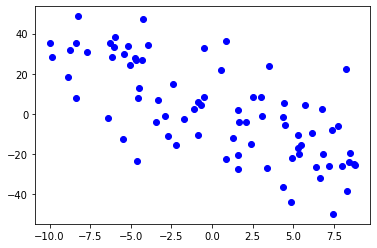

In [527]:
from keras.layers import Dense, Activation
from keras.optimizers import SGD

model = Sequential()
model.add(Dense(1, input_dim=2))
model.add(Activation('linear'))
# model.add(Dense(1, input_dim=2))
# model.add(Activation('linear'))

sgd = SGD(0.01)
model.compile(loss='mse',optimizer=sgd)

history = model.fit(X_train, Y_train, epochs=500,verbose=0)

pred = model.predict(X_train)

plt.scatter(X_train[:,0], Y_train, c='blue')
plt.plot(X_train, pred, color='b')
plt.show()